In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load and preprocess data
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28)) / 255.0
test_images = test_images.reshape((10000, 28*28)) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


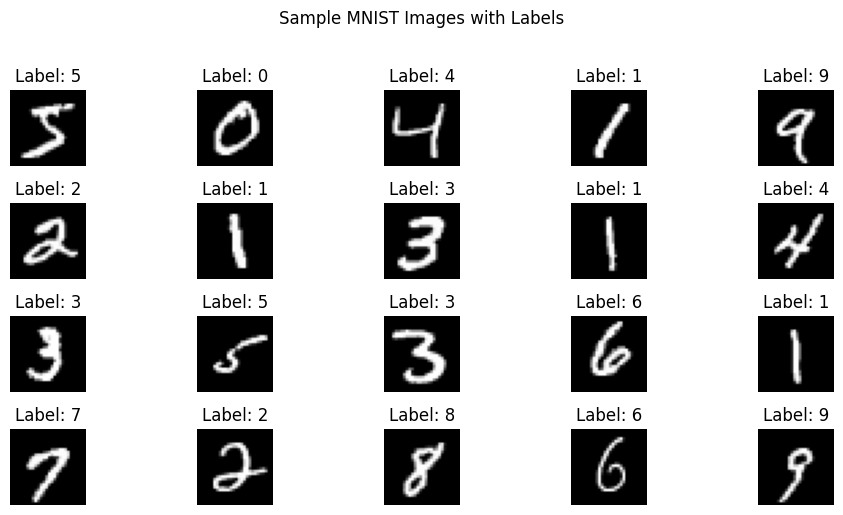

In [3]:
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels', y=1.02)
plt.tight_layout()
plt.show()

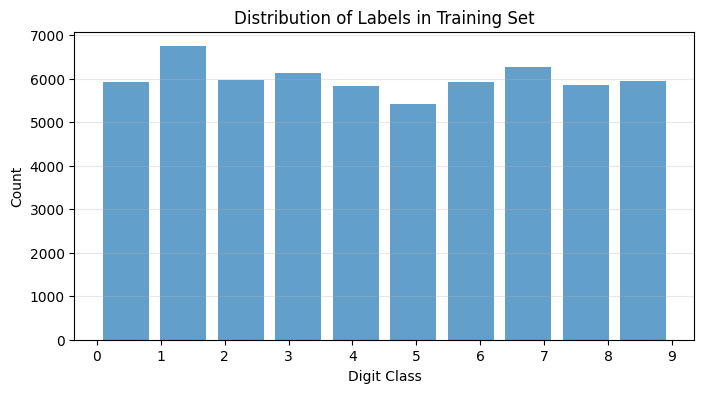

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(train_labels, bins=10, rwidth=0.8, alpha=0.7)
plt.xticks(range(10))
plt.title('Distribution of Labels in Training Set')
plt.xlabel('Digit Class')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [5]:
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9953 - loss: 0.0133 - val_accuracy: 0.9779 - val_loss: 0.0985
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9965 - loss: 0.0108 - val_accuracy: 0.9816 - val_loss: 0.0687
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9968 - loss: 0.0091 - val_accuracy: 0.9800 - val_loss: 0.0843
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9978 - loss: 0.0084 - val_accuracy: 0.9812 - val_loss: 0.0935
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9976 - loss: 0.0076 - val_accuracy: 0.9806 - val_loss: 0.0881
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9972 - loss: 0.0091 - val_accuracy: 0.9823 - val_loss: 0.0819
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9977 - loss: 0.0071 - val_accuracy: 0.9829 - val_loss: 0.0821
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9974 - loss: 0.0075 - val

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9771 - loss: 0.1103

Test accuracy: 0.9818


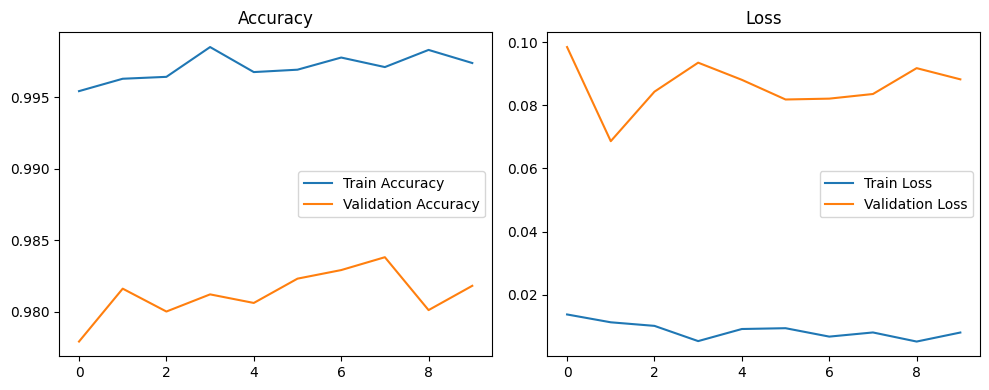

In [12]:
# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


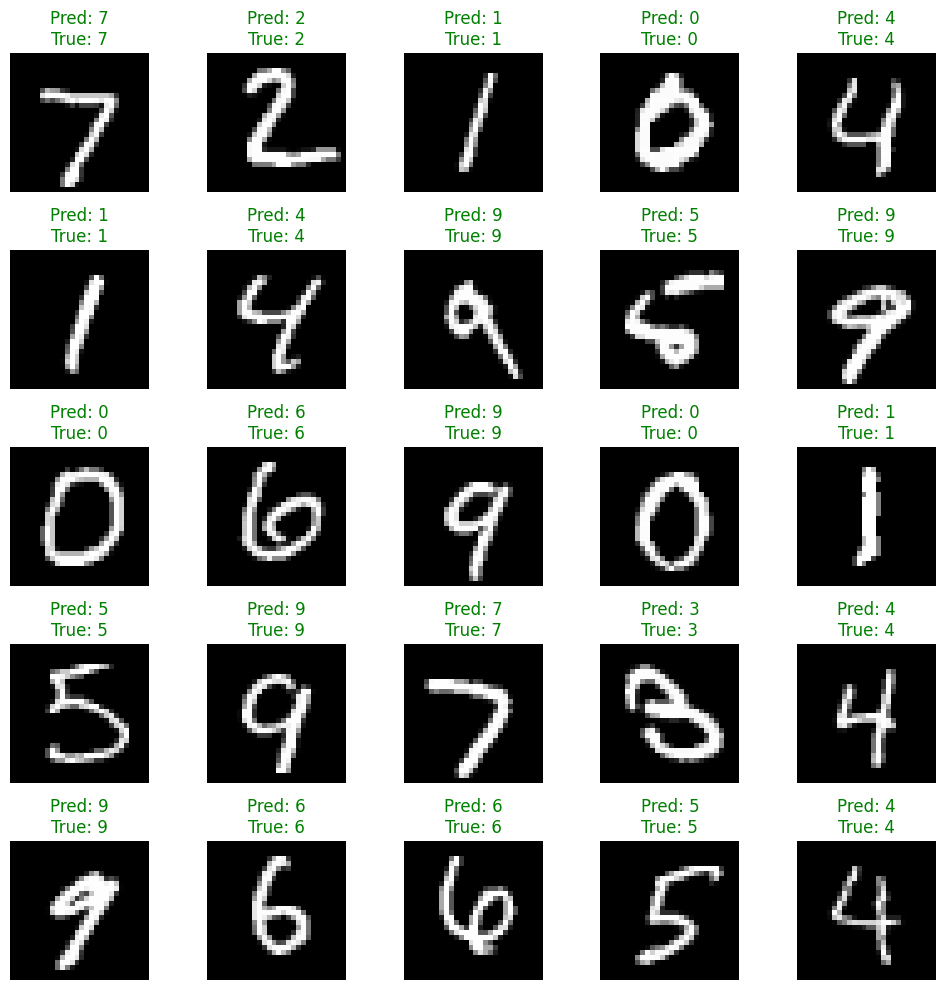

In [13]:
# Make predictions and visualize
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [18]:
experiments = [
    {"name": "1 Layer - 64 ReLU", "layers": [64], "activation": "relu"},
    {"name": "2 Layers - 128 ReLU + 64 ReLU", "layers": [128, 64], "activation": "relu"},
    {"name": "2 Layers - 256 Tanh + 128 Tanh", "layers": [256, 128], "activation": "tanh"},
    {"name": "3 Layers - 512 ReLU + 256 ReLU + 128 ReLU", "layers": [512, 256, 128], "activation": "relu"}
]
results = []

In [19]:
for exp in experiments:
    print(f"\nRunning Experiment: {exp['name']}")
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    for units in exp["layers"]:
        model.add(Dense(units, activation=exp["activation"]))

    model.add(Dense(10, activation='softmax'))  # Output layer

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=10,
                        batch_size=128,
                        validation_split=0.2,
                        verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results.append((exp["name"], history, test_acc))
    print(f"Test Accuracy: {test_acc:.4f}")


Running Experiment: 1 Layer - 64 ReLU


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Test Accuracy: 0.9702

Running Experiment: 2 Layers - 128 ReLU + 64 ReLU
Test Accuracy: 0.9755

Running Experiment: 2 Layers - 256 Tanh + 128 Tanh
Test Accuracy: 0.9778

Running Experiment: 3 Layers - 512 ReLU + 256 ReLU + 128 ReLU
Test Accuracy: 0.9760


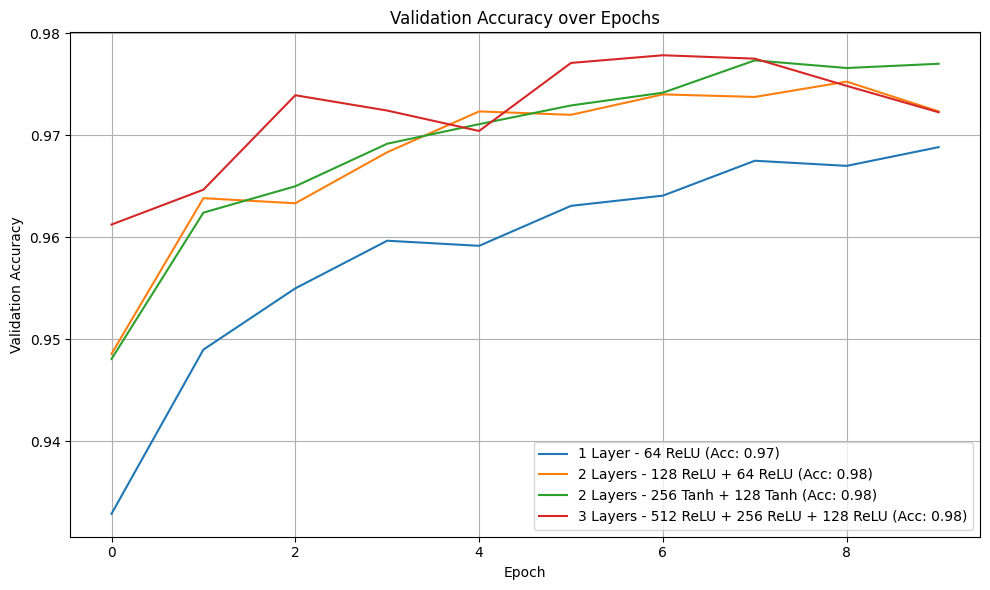

In [20]:

plt.figure(figsize=(10, 6))
for name, history, acc in results:
    plt.plot(history.history['val_accuracy'], label=f'{name} (Acc: {acc:.2f})')

plt.title("Validation Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
